# XGBoost Basis

In [5]:
import sys
print(sys.executable)

c:\Users\faulh\anaconda3\python.exe


In [6]:
!{sys.executable} -m pip install xgboost

                                              0.0/56.8 MB ? eta -:--:--
                                              0.1/56.8 MB 2.4 MB/s eta 0:00:24
                                              0.4/56.8 MB 4.0 MB/s eta 0:00:15
                                              0.7/56.8 MB 4.8 MB/s eta 0:00:12
                                              1.1/56.8 MB 5.8 MB/s eta 0:00:10
     -                                        1.5/56.8 MB 6.3 MB/s eta 0:00:09
     -                                        1.9/56.8 MB 7.0 MB/s eta 0:00:08
     -                                        2.3/56.8 MB 7.3 MB/s eta 0:00:08
     -                                        2.8/56.8 MB 7.5 MB/s eta 0:00:08
     --                                       3.2/56.8 MB 7.8 MB/s eta 0:00:07
     --                                       3.6/56.8 MB 7.9 MB/s eta 0:00:07
     --                                       4.1/56.8 MB 8.2 MB/s eta 0:00:07
     ---                                      4.6/56.8 MB 8

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

In [9]:
# 📥 1. Daten einlesen
df = pd.read_csv("data/train_preprocessed.csv")         # Trainingsdaten mit Zielspalte
test = pd.read_csv("data/test_preprocessed.csv")        # Testdaten ohne Zielspalte
target = pd.read_csv("data/test_target.csv")  # Testzielwerte mit AdoptionSpeed + PetID

# 🧹 2. Features & Ziel trennen
X_train = df.drop(columns=["AdoptionSpeed", "PetID"])
y_train = df["AdoptionSpeed"]

X_test = test.drop(columns=["PetID"])
y_test = target["AdoptionSpeed"]  # Zielwerte für Test (optional)

# 🧠 3. XGBoost-Modell mit Defaultparametern + reproduzierbarem Seed
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=5,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# 🚀 4. Training
model.fit(X_train, y_train)

# 🔍 5. Vorhersage auf Testdaten
y_pred = model.predict(X_test)

# 📊 6. Evaluation (falls Zielwerte vorhanden)
print(classification_report(y_test, y_pred))

# 🧾 7. Ergebnis zusammenführen (optional)
result_df = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed_Pred": y_pred,
    "AdoptionSpeed_True": y_test.values
})

# 💾 8. Optional: Submission speichern
submission = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed": y_pred
})
submission.to_csv("submission.csv", index=False)


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:54:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3972
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.00      3972
   macro avg       0.20      0.00      0.00      3972
weighted avg       1.00      0.00      0.00      3972



c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
print(y_test.value_counts())


0    3972
Name: AdoptionSpeed, dtype: int64


In [11]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          3972 non-null   object
 1   AdoptionSpeed  3972 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.2+ KB


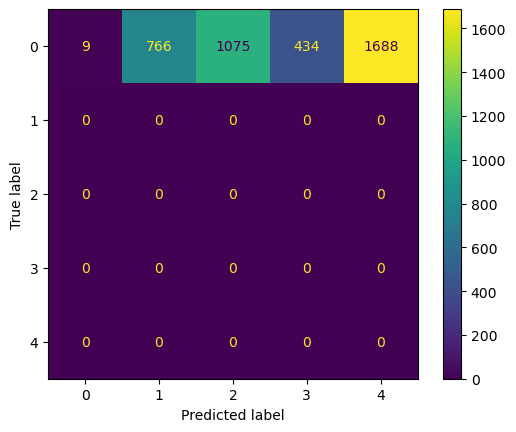

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])

# Anzeige
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
#

In [14]:
print(y_train.value_counts())


4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7, 9]
}

grid = GridSearchCV(
    xgb.XGBClassifier(random_state=42),
    param_grid,
    scoring="accuracy",
    cv=3
)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 9}


: 